[IPython Notebook](plotting.ipynb) |  [Python Script](plotting.py)

Plotting
============================

This tutorial explains the high-level interface to plotting provided by the Bundle.  You are of course always welcome to access arrays and plot manually.

The default plotting backend in PHOEBE is [matplotlib](http://matplotlib.org), and this tutorial will focus solely on matplotlib plots and will assume some familiarity with matplotlib and its terminology (ie axes, artists, subplots, etc).

Other plotting backends are incorporated into PHOEBE, although to varying degrees and may not support all features described here.  For more information see the [Alternate Plotting Backends Tutorial](./alternate_plotting).

Setup
-----------------------------

This first line is only necessary for ipython noteboooks - it allows the plots to be shown on this page instead of in interactive mode

In [1]:
%matplotlib inline

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.


In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.default_binary()
b['q'] = 0.8
b['ecc'] = 0.1

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


And we'll attach some dummy datasets.  See [Datasets](datasets) for more details.

In [3]:
b.add_dataset('ORB', time=np.linspace(0,10,1000), dataset='orb01', component=['primary', 'secondary'])

times, fluxes, errors = np.loadtxt('test.lc.in', unpack=True)
times = times [::10]
fluxes = fluxes [::10]
errors = errors[::10]
# TODO: load entire dataset once optimized so it doesn't take too long
b.add_dataset('LC', time=times, flux=fluxes, sigma=errors, dataset='lc01')

<ParameterSet: 11 parameters | kinds: LC, LC_dep>

And run the forward models.  See [Computing Observables](compute.html) for more details.

In [4]:
b.set_value('incl@orbit', 90)
b.run_compute(model='run_with_incl_90') 

b.set_value('incl@orbit', 85)
b.run_compute(model='run_with_incl_85')

b.set_value('incl@orbit', 80)
b.run_compute(model='run_with_incl_80')

<ParameterSet: 16 parameters | kinds: ORB, LC>

Showing and Saving
-----------------------

**NOTE:** in IPython notebooks calling plot will display directly below the call to plot.  When not in IPython you have several options for viewing the figure:

- call plt.show() after calling plot
- use the returned axes and artist objects however you'd like
- pass show=True to the plot method (same as calling plt.show())
- pass save='myfilename.png' to the plot method (same as calling plt.savefig('myfilename.png'))

Default Plots
-----------------

To see the options for plotting that are dataset-dependent see the tutorials on that dataset method:

- [ORB dataset](ORB)
- [MESH dataset](MESH)
- [LC dataset](LC)
- [RV dataset](RV)
- [ETV dataset](ETV)

By calling the plot method on the bundle (or any ParameterSet) without any arguments, a plot or series of subplots will be built based on the contents of that ParameterSet.

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


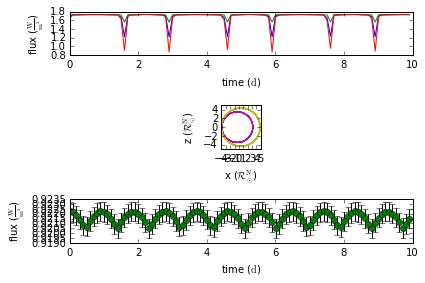

In [5]:
axs, artists = b.plot()

Any call to plot returns 2 lists - a list of the axes and a list of the artists that were drawn on those axes.  Generally we won't need to do anything with these, but having them returned could come in handy if you want to manually edit those axes or artists before saving the image.

In this example with so many different models and datasets, it is quite simple to build a single plot by filtering the bundle and calling the plot method on the resulting ParameterSet.

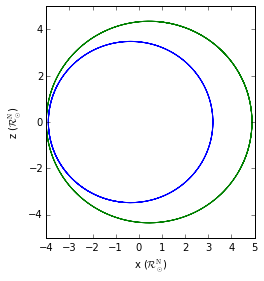

In [6]:
axs, artists = b['ORB@run_with_incl_80'].plot()

Time (highlight and uncover)
----------------------------------------------

The built-in plot method also provides convenience options to either highlight the interpolated point for a given time, or only show the dataset up to a given time.

### Highlight

The higlight option is enabled by default so long as a time (or times) is passed to plot.  It simply adds an extra marker at the sent time - interpolating in the synthetic model if necessary.

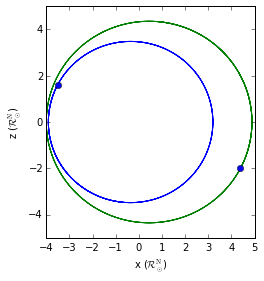

In [7]:
axs, artists = b['ORB@run_with_incl_80'].plot(time=1.0)

To change the style of the "highlighted" points, you can pass matplotlib recognized [markers](http://matplotlib.org/api/markers_api.html), [colors](http://matplotlib.org/api/colors_api.html), and markersizes to the highlight_marker, highlight_color, and highlight_ms keywords, respectively.

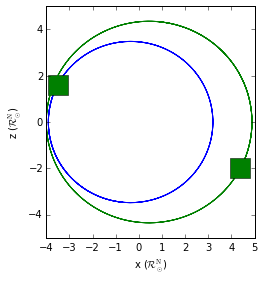

In [8]:
axs, artists = b['ORB@run_with_incl_80'].plot(time=1.0, highlight_marker='s', highlight_color='g', highlight_ms=20)

To disable highlighting, simply send highlight=False

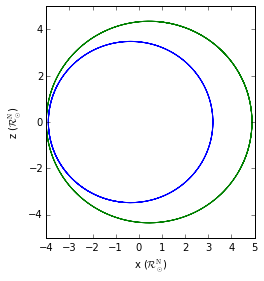

In [9]:
axs, artists = b['ORB@run_with_incl_80'].plot(time=1.0, highlight=False)

### Uncover

Uncover shows the observations or synthetic model up to the provided time and is disabled by default, even when a time is provided, but is enabled simply by providing uncover=True.  There are no additional options available for uncover.



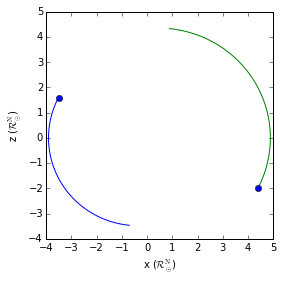

In [10]:
axs, artists = b['ORB@run_with_incl_80'].plot(time=1.0, uncover=True)

Selecting Datasets
-------------------------

In addition to filtering and calling plot on the resulting ParameterSet, plot can accept a twig or filter on any of the available parameter tags.

For this reason, any of the following give identical results:

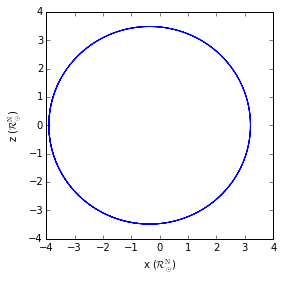

In [11]:
axs, artists = b['primary@ORB@run_with_incl_80'].plot()

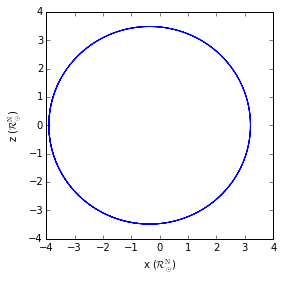

In [12]:
axs, artists = b.plot(component='primary', kind='ORB', model='run_with_incl_80')

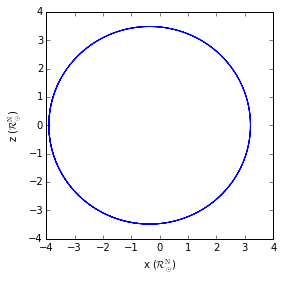

In [13]:
axs, artists = b.plot('primary@ORB@run_with_incl_80')

An advantage to this last approach (providing a twig as a positional argument to the plot method) is that it can accept multiple positional arguments to plot from multiple datasets in a single call.

When these have the same dataset method, they will automatically be drawn to the same axes (by default).

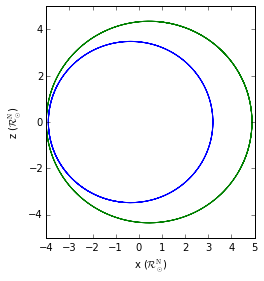

In [14]:
axs, artists = b.plot('primary@ORB@run_with_incl_80', 'secondary@ORB@run_with_incl_80')

If the datasets have multiple dataset methods, subplots will automatically be created.

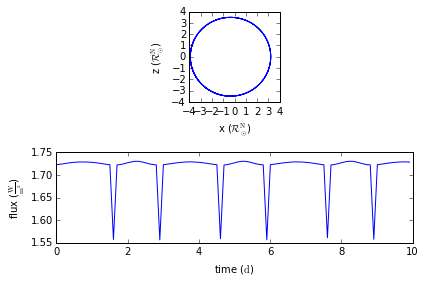

In [15]:
axs, artists = b['run_with_incl_80'].plot('primary@ORB', 'lc01')

Later we'll see how to customize the layout of these subplots in the figure and how to pass other plotting options.

Selecting Arrays
--------------------

So far, each plotting call automatically chose default arrays from that dataset to plot along each axis.  To override these defaults, simply point to the qualifier of the array that you'd like plotted along a given axis.

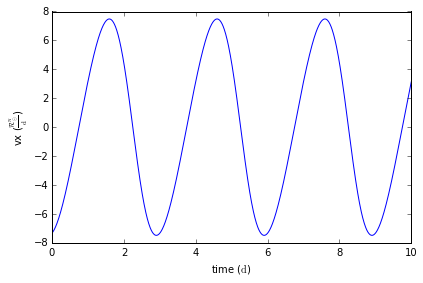

In [16]:
axs, artists = b['orb01@primary@run_with_incl_80'].plot(x='time', y='vx')

To see the list of available qualifiers that could be passed for x or y, call the qualifiers (or twigs) property on the ParameterSet.

In [17]:
b['orb01@primary@run_with_incl_80'].qualifiers

['time', 'y', 'x', 'vx', 'vy', 'vz', 'z']

For more information on each of the available arrays, see the relevant tutorial on that dataset method:

- [ORB dataset](ORB)
- [MESH dataset](MESH)
- [LC dataset](LC)
- [RV dataset](RV)
- [ETV dataset](ETV)

### Selecting Phase

And to plot in phase we just send x='phase' or x='phase:binary'.

Setting x='phase' will use the ephemeris from the top-level of the hierarchy
(as if you called b.get_ephemeris()), whereas passing a string after the colon, 
will use the ephemeris of that component.

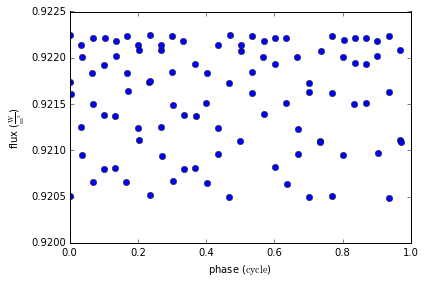

In [18]:
axs, artists = b['lc01@dataset'].plot(x='phase', yerrors=None)

Units
---------------------

Likewise, each array that is plotted is automatically plotted in its default units. To override these defaults, simply provide the unit (as a string or as a astropy units object) for a given axis.

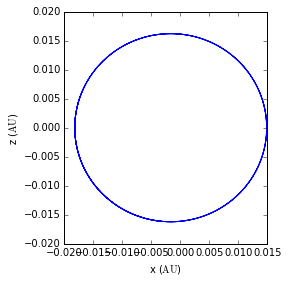

In [19]:
axs, artists = b['orb01@primary@run_with_incl_80'].plot(xunit='AU', yunit='AU')

**WARNING**: when plotting two arrays with the same dimensions, PHOEBE attempts to set the aspect ratio to equal, but overriding to use two different units will result in undesired results.  This may be fixed in the future, but for now can be avoided by using consistent units for the x and y axes when they have the same dimensions.

Axes Labels
--------------------

Axes labels are automatically generated from the qualifier of the array and the plotted units.  To override these defaults, simply pass a string for the label of a given axis.

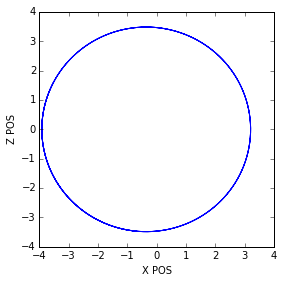

In [20]:
axs, artists = b['orb01@primary@run_with_incl_80'].plot(xlabel='X POS', ylabel='Z POS')

Axes Limits
----------------------

Axes limits are determined by the data automatically.  To set custom axes limits, either use matplotlib methods on the returned axes objects, or pass limits as a list or tuple.

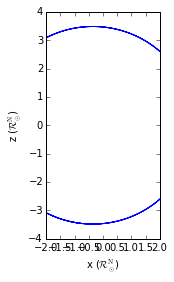

In [21]:
axs, artists = b['orb01@primary@run_with_incl_80'].plot(xlim=(-2,2))

Errorbars
------------

In the cases of observational data and synthetics, errorbars will automatically 
be added.

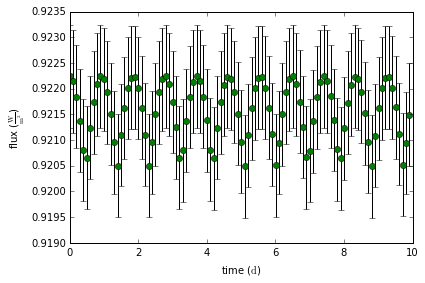

In [22]:
axs, artists = b['lc01@dataset'].plot()

To disable the errorbars, simply set yerrors=None.

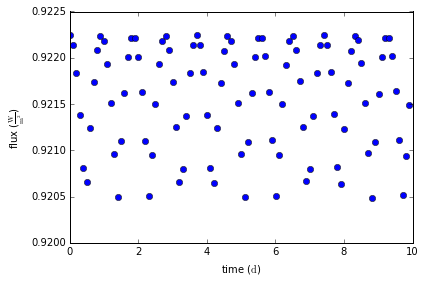

In [23]:
axs, artists = b['lc01@dataset'].plot(yerrors=None)

Colors
----------------------

Colors of points and lines, by default, cycle according to matplotlib's color policy.  To manually set the color, simply pass a matplotlib recognized [color](http://matplotlib.org/api/colors_api.html) to the color keyword.

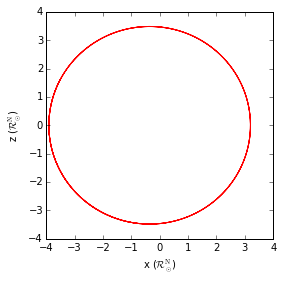

In [24]:
axs, artists = b['orb01@primary@run_with_incl_80'].plot(color='r')

In addition, you can point to an array in the dataset to use as color.

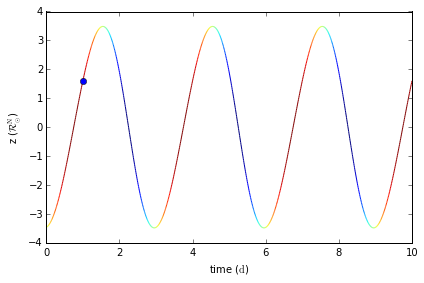

In [25]:
axs, artists = b['orb01@primary@run_with_incl_80'].plot(time=1.0, x='time', color='vz')
# TODO [BUG]: the limits don't set correctly unless time is provided and highlight=True
# TODO [BUG]: color='y' does not work because that is recognized as yellow BEFORE y-qualifier

Choosing colors works slightly differently for meshes (ie you can set facecolor and edgecolor and facecmap and edgecmap).  For more details, see the tutorial on the [MESH dataset](MESH).

### Colormaps

The colormaps is determined automatically based on the parameter used for coloring (ie RVs will be a red-blue colormap).  To override this, pass a matplotlib recognized [colormap](http://matplotlib.org/api/pyplot_summary.html#matplotlib.pyplot.colormaps) to the cmap keyword.

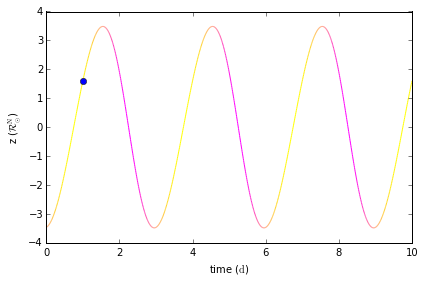

In [26]:
axs, artists = b['orb01@primary@run_with_incl_80'].plot(time=1.0, x='time', color='vz', cmap='spring')
# TODO [BUG]: the limits don't set correctly unless time is provided and highlight=True
# TODO [BUG]: color='y' does not work because that is recognized as yellow BEFORE y-qualifier

### Adding a Colorbar

**COMING SOON**: colorbar support is not currently implemented for all cases

In [27]:
#axs, artists = b['orb01@primary@run_with_incl_80'].plot(time=1.0, x='time', color='vz')
#plt.colorbar()

Labels and Legends
-----------------------

To add a legend, simply call plt.legend (for the current axes) or ax.legend on one of the returned axes.

For details on placement and formatting of the legend see [matplotlib's documentation](http://matplotlib.org/users/legend_guide.html#plotting-guide-legend).

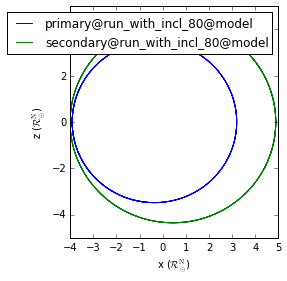

In [28]:
axs, artists = b['ORB@run_with_incl_80'].plot()
legend = plt.legend()

The legend labels are generated automatically, but can be overriden by passing a string to the label keyword.

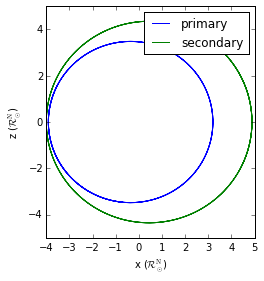

In [29]:
axs, artists = b['primary@ORB@run_with_incl_80'].plot(label='primary')
axs, artists = b['secondary@ORB@run_with_incl_80'].plot(label='secondary')
legend = axs[0].legend()

Other Plotting Options
----------------------

Valid plotting options that are directly passed to matplotlib include:
- linestyle
- linewidth
- marker
- markersize
- color (see section above on Providing Colors)

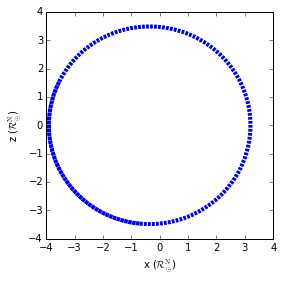

In [30]:
axs, artists = b['orb01@primary@run_with_incl_80'].plot(linestyle=':', linewidth=4)

Custom Subplots
-------------------

The plot method can both optionally take and return a matplotlib axes object.
This makes it quite easy to quickly build a figure with multiple subplots.

Below we'll mix a bunch of different ways to call plotting , and mix in highlighting
and uncovering.  The only real difference here from before is that we pass a 
single matplotlib axes to the plot call - that is the axes on which all lines 
will be drawn during that call, even if it loops and creates multiple lines.  
The actual axes instance is returned, and we want to create the legend on that 
axes.

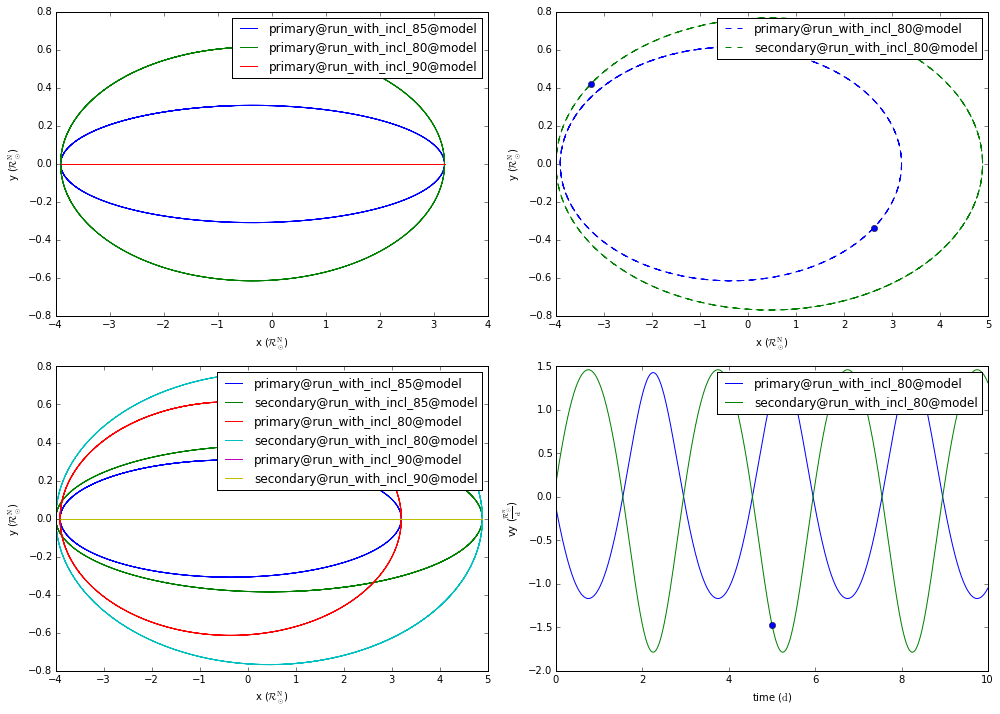

In [31]:
fig = plt.figure(figsize=(14,10))
ax = [fig.add_subplot(2,2,i+1) for i in range(4)]

axs, artists = b.plot('orb01@primary', y='y', ax=ax[0])
ax[0].legend()

axs, artists = b['orb01@run_with_incl_80'].plot(y='y', linestyle='--', time=5, uncover=True, ax=ax[1])
ax[1].legend()

axs, artists = b.plot(dataset='orb01', y='y', ax=ax[2])
ax[2].legend()

axs, artists = b.plot(dataset='orb01', model='run_with_incl_80', x='time', y='vy', time=5, uncover=True, ax=ax[3])
ax[3].legend()

Alternatively, this can be done in a single call to plot by passing dictionaries as positional arguments.  Each dictionary, in essence, is passed on to its own plot call.



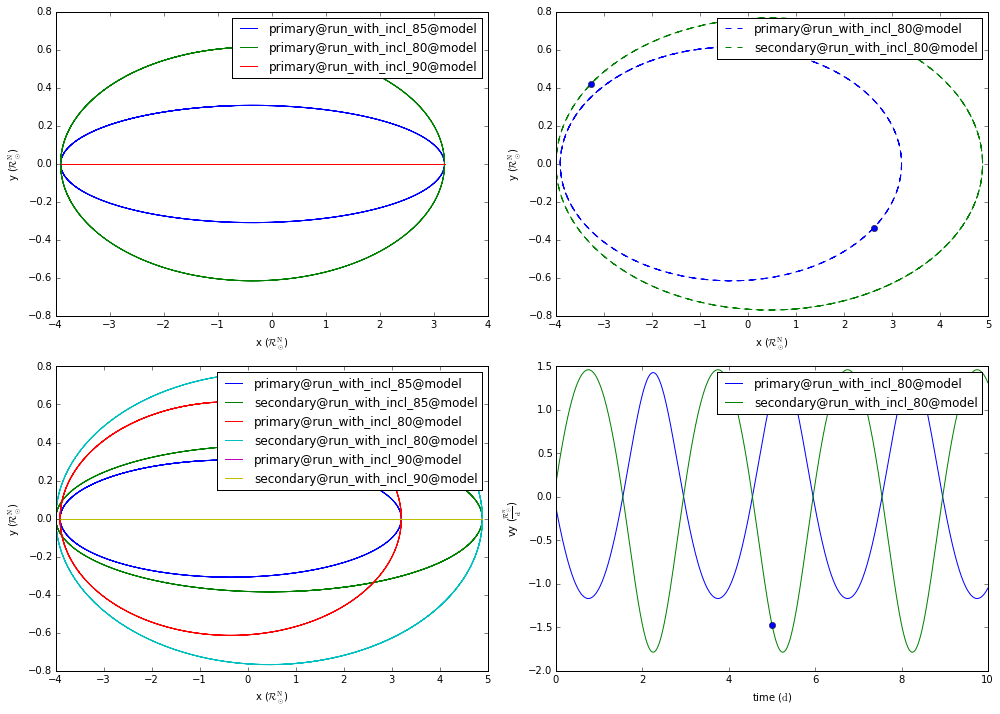

In [32]:
fig = plt.figure(figsize=(14,10))
ax = [fig.add_subplot(2,2,i+1) for i in range(4)]

plot1 = {'twig': 'orb01@primary', 'y': 'y', 'ax':ax[0]}
plot2 = {'twig': 'orb01@run_with_incl_80', 'y': 'y', 'linestyle': '--', 'time': 5, 'uncover': True, 'ax':ax[1]}
plot3 = {'twig': 'orb01', 'y': 'y', 'ax': ax[2]}
plot4 = {'dataset': 'orb01', 'model': 'run_with_incl_80', 'x': 'time', 'y': 'vy', 'time': 5, 'uncover': True, 'ax': ax[3]}

axs, artists = b.plot(plot1, plot2, plot3, plot4)
for axi in ax:
    axi.legend()

Note that now when passing additional arguments, those will apply as defaults to **EACH** of the dictionaries, but will not override any values explicitly provided in the dictionaries.

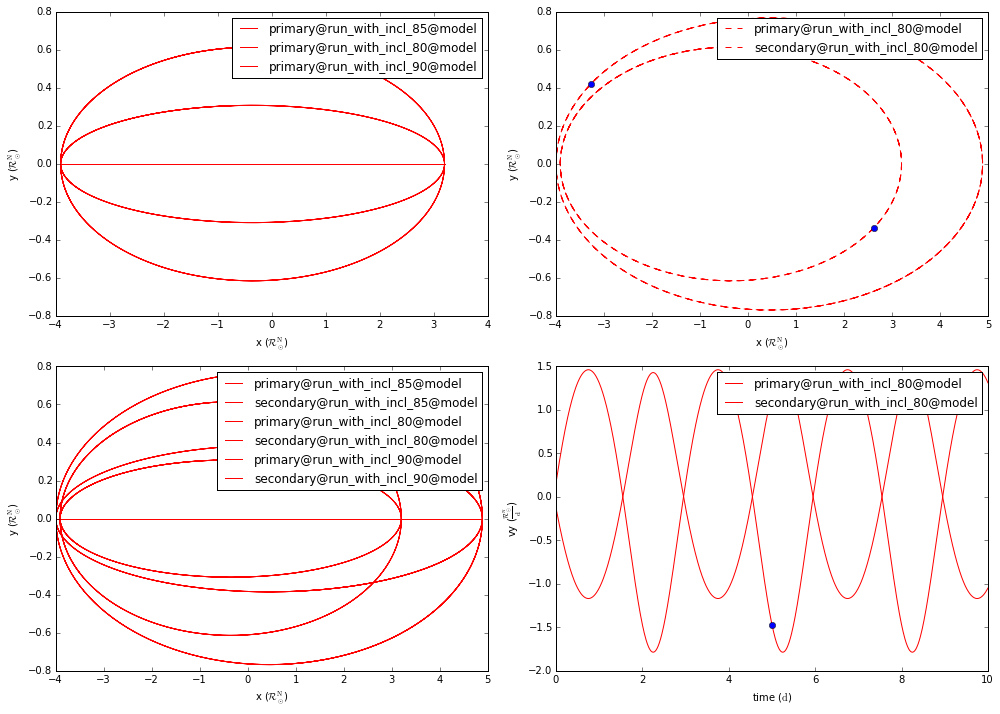

In [33]:
fig = plt.figure(figsize=(14,10))
ax = [fig.add_subplot(2,2,i+1) for i in range(4)]

plot1 = {'twig': 'orb01@primary', 'y': 'y', 'ax':ax[0]}
plot2 = {'twig': 'orb01@run_with_incl_80', 'y': 'y', 'linestyle': '--', 'time': 5, 'uncover': True, 'ax':ax[1]}
plot3 = {'twig': 'orb01', 'y': 'y', 'ax': ax[2]}
plot4 = {'dataset': 'orb01', 'model': 'run_with_incl_80', 'x': 'time', 'y': 'vy', 'time': 5, 'uncover': True, 'ax': ax[3]}

axs, artists = b.plot(plot1, plot2, plot3, plot4, x='x', y='z', color='r')
for axi in ax:
    axi.legend()

3D Axes
-------------

To plot a in 3d, simply provide a 3D axes (or have it as your current axes available through plt.gca())

Here many of the same principles apply as above - you can change the array by pointing to a parameter for z, set zlim, zunit, zlabel, etc.

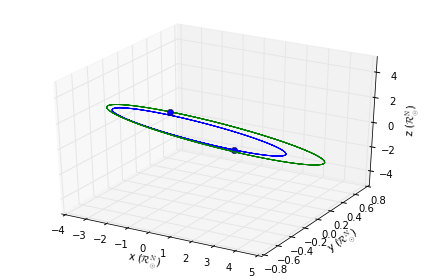

In [34]:
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')

axes, artists = b['ORB@run_with_incl_80'].plot(time=0, facecolor='teff', edgecolor=None, ax=ax)